# Data research

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from sqlalchemy import func
from models import BehaviorData

from utils.db_utils import create_db_session

data_file_name = '/Users/Ethan/Developer/Projects/College/大四下/數據分析/期末/91APP_DataSet_2023'
start_time = datetime(2019, 1, 1)
end_time = datetime(2019, 1, 2)

session = create_db_session()

## plot CDF for session time span and action count

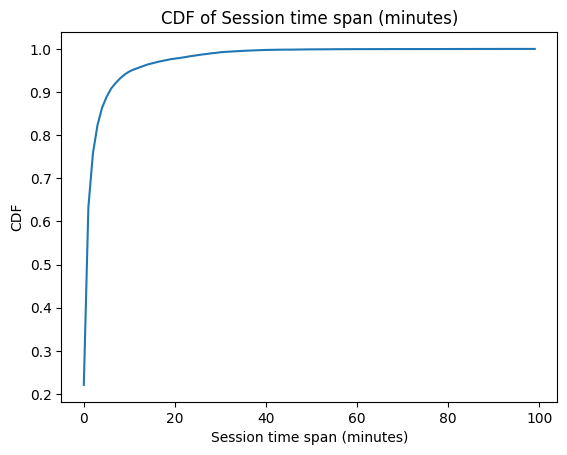

In [6]:
x, y = [], []
result = session.query(
    func.max(BehaviorData.EventTime).label('max_time'),
    func.min(BehaviorData.EventTime).label('min_time')
).filter(
    BehaviorData.HitTime >= start_time,
    BehaviorData.HitTime < end_time
).group_by(
    BehaviorData.FullvisitorId,
    BehaviorData.HitTime
).all()

session_time = np.array([s.max_time - s.min_time for s in result])

total = len(session_time)
for i in range(0, 100):
    x.append(i)
    y.append((session_time <= timedelta(minutes=i)).sum() / total)
plt.title('CDF of Session time span (minutes)')
plt.ylabel('CDF')
plt.xlabel('Session time span (minutes)')
plt.plot(x, y)
plt.show()

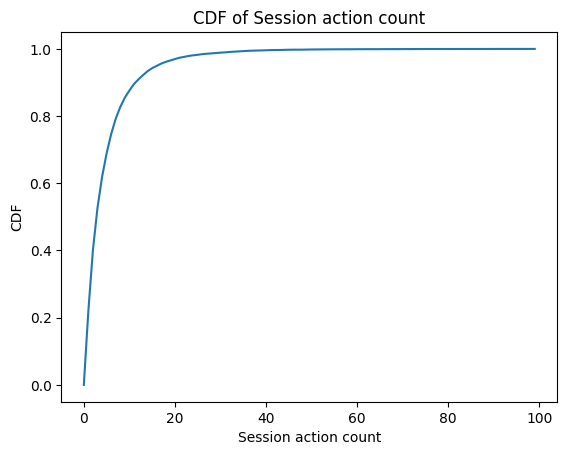

In [7]:
x, y = [], []
result = session.query(
    func.count()
).filter(
    BehaviorData.HitTime >= start_time,
    BehaviorData.HitTime < end_time
).group_by(
    BehaviorData.FullvisitorId,
    BehaviorData.HitTime
).all()

session_size = np.array([s[0] for s in result])

total = len(result)
for i in range(0, 100):
    x.append(i)
    y.append((session_size <= i).sum() / total)
plt.title('CDF of Session action count')
plt.ylabel('CDF')
plt.xlabel('Session action count')
plt.plot(x, y)
plt.show()

28 percent of session only have 1 action
